In [3]:
# Common libraries
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import json 

In [3]:
# Messari initialization
from messari.messari import Messari
m = Messari('cb0d3a33-c4c5-4b50-9fff-5dce65d44b97')

# Test messari
markets_df = m.get_all_markets()
markets_df.head()

,id,exchange_id,base_asset_id,quote_asset_id,trade_start,trade_end,version,excluded_from_price,exchange_name,base_asset_symbol,quote_asset_symbol,pair,price_usd,vwap_weight,volume_last_24_hours,has_real_volume,deviation_from_vwap_percent,last_trade_at
exchange_slug,,,,,,,,,,,,,,,,,,
uniswap-v3,00029600-7335-4a57-94ff-87beffaf8b97,65d7db09-764a-41a8-ac63-50a2d296f874,e23572af-c451-4bed-a085-361f9c207589,4d7b4b96-ecd1-47f7-b8ec-c054dd78b7ed,None,None,1,True,Uniswap (v3),QBU,WETH,QBU-WETH,NaN,1.0,NaN,True,NaN,None
spookyswap,0002b156-531b-4827-91c9-89ccc6a123af,90bffaa1-cb56-4647-afb5-e67308bd9595,f5f2202c-e28e-460e-a2a2-92bf3951c372,33f4a7e6-c4de-4883-bffb-d5f2119d55c6,None,None,1,True,SpookySwap,ASHARE,7SHARE,ASHARE-7SHARE,14.017088,1.0,1.573738e+01,True,-14.416778,2022-04-14T03:00:00Z
curve,00030799-f441-4b8e-a327-889537d4c62a,19e0fd2a-2226-4552-80da-749a66953588,a3b64831-4288-48bd-a3e7-eb4f77f6f740,938dec5f-c021-42a3-95da-6cece8497dc9,None,None,1,True,Curve,DAI,ALUSD,DAI-ALUSD,0.999981,1.0,1.081230e+07,True,0.320868,2022-04-14T01:30:00Z
uniswap,0006addf-d3d2-491a-8a66-36236445c527,6efbfc8a-18c9-4c6f-aa78-feea100521cf,3f548a16-866f-4e2c-b3e9-5df6d32d9083,51f8ea5e-f426-4f40-939a-db7e05495374,None,None,1,True,Uniswap (v2),UOS,USDT,UOS-USDT,1.036407,1.0,9.294200e+01,True,-4.607395,2022-04-14T00:30:00Z
yobit,000bd377-28be-488c-80cc-cd18e90ba3ff,2087a29e-6a27-4d51-ba3b-d9f112f93c38,c10e0960-9175-4c44-9390-86a8de17c2a1,1e31218a-e44e-4285-820c-8282ee222035,2019-04-12T10:49:20Z,2019-04-25T18:24:16Z,1,False,YoBit,LUC,BTC,LUC-BTC,NaN,0.0,NaN,False,NaN,None


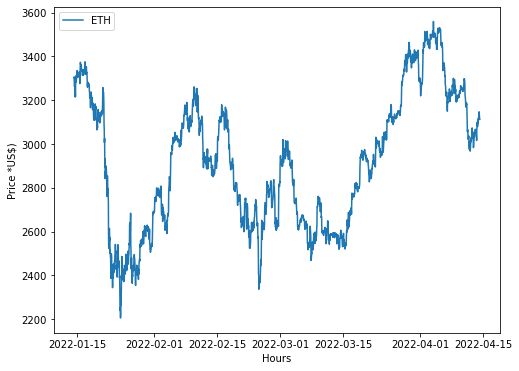

In [7]:
# Coingecko initialization
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Test coingecko
coingecko_eth_data = cg.get_price(ids='ethereum',vs_currencies='usd,btc',include_market_cap='true')
coingecko_eth_data
ethmc = cg.get_coin_market_chart_by_id(id='ethereum', vs_currency='usd', days=90)
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.plot([datetime.utcfromtimestamp(x[0]/1000) for x in ethmc['prices']], 
        [x[1] for x in ethmc['prices']], label='ETH')
ax.set_xlabel('Hours')
ax.set_ylabel('Price *US$)')
ax.legend();

In [16]:
# DefiLLama initialization & test
tvl = requests.get('https://api.llama.fi/protocol/aave').json()['tvl']
tvl

[{'date': 1578528000, 'totalLiquidityUSD': 320023.3881982258},
 {'date': 1578614400, 'totalLiquidityUSD': 481703.1835921449},
 {'date': 1578700800, 'totalLiquidityUSD': 831125.6185605731},
 {'date': 1578787200, 'totalLiquidityUSD': 1017686.511062048},
 {'date': 1578873600, 'totalLiquidityUSD': 1189864.7882013186},
 {'date': 1578960000, 'totalLiquidityUSD': 2054055.3050841119},
 {'date': 1579046400, 'totalLiquidityUSD': 2047218.356038085},
 {'date': 1579132800, 'totalLiquidityUSD': 2260613.2155752108},
 {'date': 1579219200, 'totalLiquidityUSD': 2439297.4180327407},
 {'date': 1579305600, 'totalLiquidityUSD': 2554658.518213561},
 {'date': 1579392000, 'totalLiquidityUSD': 2655681.843977463},
 {'date': 1579478400, 'totalLiquidityUSD': 2903253.7810532833},
 {'date': 1579564800, 'totalLiquidityUSD': 2986549.6820869115},
 {'date': 1579651200, 'totalLiquidityUSD': 3808561.073074688},
 {'date': 1579737600, 'totalLiquidityUSD': 4004631.2596525815},
 {'date': 1579824000, 'totalLiquidityUSD': 39706

In [ ]:
# Glassnode initialization


# Test Glassnode